https://mobaku.jp/covid-19/  
の人口変動分析 の途中で出くわしたエラー

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

## 事象

In [2]:
# ２０２１年の祝日を適当に抜き出して並べただけで、データに意味はありません
date_str_list = ['2021-01-11', '2021-02-11', '2021-03-20', '2021-04-29', '2021-05-05']

In [3]:
val_list = [10, 30, 20, 50, 40]

In [4]:
df_date_str = pd.DataFrame({
    'date'    : date_str_list,
    'val' : val_list
})

In [5]:
df_date_str

,date,val
0,2021-01-11,10
1,2021-02-11,30
2,2021-03-20,20
3,2021-04-29,50
4,2021-05-05,40


In [6]:
df_date_str.dtypes

date    object
val      int64
dtype: object

ConversionError: Failed to convert value(s) to axis units: [datetime.datetime(2021, 3, 1, 0, 0), datetime.datetime(2021, 4, 1, 0, 0)]

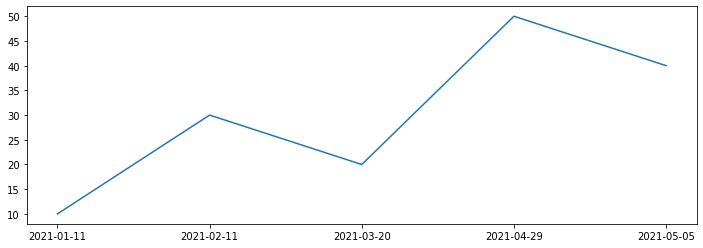

In [7]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(df_date_str['date'], df_date_str['val'])

# 参考：https://bunsekikobako.com/axvspan-and-axhspan/
start_datetime = datetime.datetime(2021, 3,1)
end_datetime = datetime.datetime(2021, 4,1)

ax.axvspan(start_datetime, end_datetime, color="gray", alpha=0.3)

## 2つの問題点、原因は共通の1つ

* 横軸が等間隔
* axvspanのところでエラーが出た

In [8]:
datetime_list = [
    datetime.datetime(2021, 1, 11),
    datetime.datetime(2021, 2, 11),
    datetime.datetime(2021, 3, 20),
    datetime.datetime(2021, 4, 29),
    datetime.datetime(2021, 5, 5),
]

In [9]:
df_datetime = pd.DataFrame({
    'date'    : datetime_list,
    'val' : val_list
})

In [10]:
df_datetime

,date,val
0,2021-01-11,10
1,2021-02-11,30
2,2021-03-20,20
3,2021-04-29,50
4,2021-05-05,40


普通にdataframeを表示しただけでは、「文字列の2021-01-11」と「日付の2021-01-11」は見分けがつかない。
データ型dtypeを確認するのが重要である。

In [11]:
df_datetime.dtypes

date    datetime64[ns]
val              int64
dtype: object

最初のDataFrame（df_date_str）を使う場合には、文字列のカラムをto_datetimeで日付型に変換する。

In [12]:
df_datetime2 = df_date_str.copy()
df_datetime2['date'] = pd.to_datetime(df_datetime2['date'])

df.equals を使ってDataFrameが同一のものか確認しよう。

In [13]:
df_datetime2.dtypes

date    datetime64[ns]
val              int64
dtype: object

In [14]:
df_datetime.equals(df_datetime2)

True

In [15]:
df_datetime.equals(df_date_str)

False

df_date_str（）

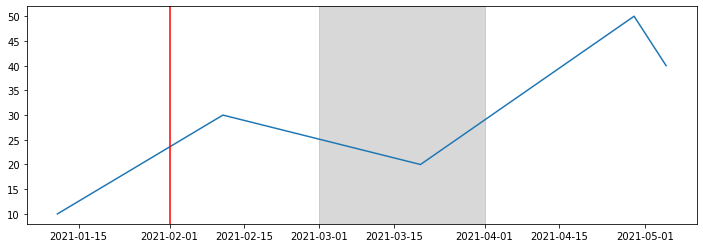

In [16]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(df_datetime['date'], df_datetime['val']) #★

# 横軸の範囲を指定して、一定区間に背景色をつける
start_datetime = datetime.datetime(2021, 3,1)
end_datetime = datetime.datetime(2021, 4,1)
ax.axvspan(start_datetime, end_datetime, color="gray", alpha=0.3)

# 横軸の位置を指定して、縦線を描く
ax.axvline(datetime.datetime(2021,2,1), color="red")